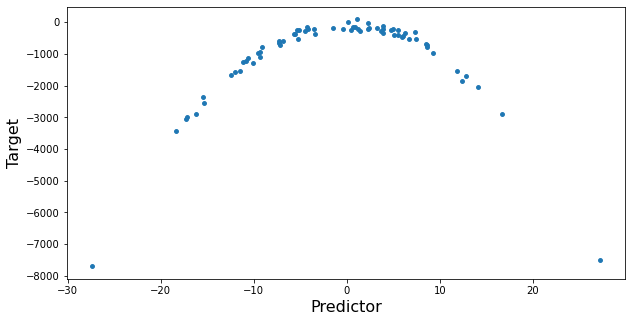

In [1]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# for calculating mean_squared error
from sklearn.metrics import mean_squared_error

# creating a dataset with curvilinear relationship
x=10*np.random.normal(0,1,70)
y=10*(-x**2)+np.random.normal(-100,100,70)

# plotting dataset
plt.figure(figsize=(10,5))
plt.scatter(x,y,s=15)
plt.xlabel('Predictor',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.show()

Let’s start with Linear Regression first:

In [2]:
# Importing Linear Regression
from sklearn.linear_model import LinearRegression

# Training Model
lm=LinearRegression()
lm.fit(x.reshape(-1,1),y.reshape(-1,1))

LinearRegression()

Let’s see how linear regression performs on this dataset:

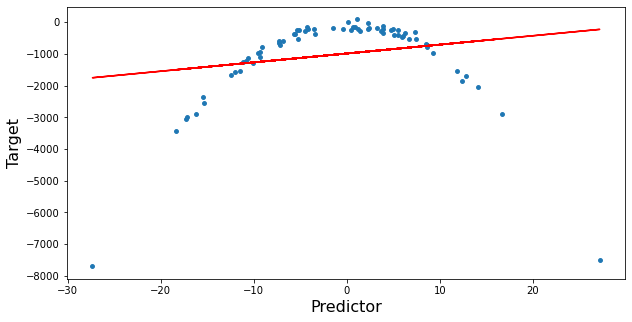

In [3]:
y_pred=lm.predict(x.reshape(-1,1))

# plotting predictions
plt.figure(figsize=(10,5))
plt.scatter(x,y,s=15)
plt.plot(x,y_pred,color='r')
plt.xlabel('Predictor',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.show()

In [4]:
print('RMSE for Linear Regression=>',np.sqrt(mean_squared_error(y,y_pred)))

RMSE for Linear Regression=> 1382.5937222289197


Here, you can see that the linear regression model is not able to fit the data properly and the RMSE (Root Mean Squared Error) is also very high.

Now, let’s try polynomial regression.
The implementation of polynomial regression is a two-step process. First, we transform our data into a polynomial using the PolynomialFeatures function from sklearn and then use linear regression to fit the parameters:

polynomial regression pipeline

We can automate this process using pipelines. Pipelines can be created using Pipeline from sklearn.

Let’s create a pipeline for performing polynomial regression:

In [5]:
# importing libraries for polynomial transform
from sklearn.preprocessing import PolynomialFeatures
# for creating pipeline
from sklearn.pipeline import Pipeline
# creating pipeline and fitting it on data
Input=[('polynomial',PolynomialFeatures(degree=2)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(x.reshape(-1,1),y.reshape(-1,1))

Pipeline(steps=[('polynomial', PolynomialFeatures()),
                ('modal', LinearRegression())])

Here, I have taken a 2-degree polynomial. We can choose the degree of polynomial based on the relationship between target and predictor. The 1-degree polynomial is a simple linear regression; therefore, the value of degree must be greater than 1.

With the increasing degree of the polynomial, the complexity of the model also increases. Therefore, the value of n must be chosen precisely. If this value is low, then the model won’t be able to fit the data properly and if high, the model will overfit the data easily.

Read more about underfitting and overfitting in machine learning here.

Let’s take a look at our model’s performance:

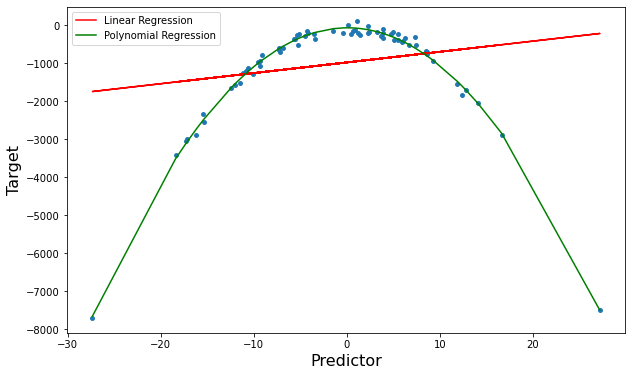

In [6]:
poly_pred=pipe.predict(x.reshape(-1,1))
#sorting predicted values with respect to predictor
sorted_zip = sorted(zip(x,poly_pred))
x_poly, poly_pred = zip(*sorted_zip)
#plotting predictions
plt.figure(figsize=(10,6))
plt.scatter(x,y,s=15)
plt.plot(x,y_pred,color='r',label='Linear Regression')
plt.plot(x_poly,poly_pred,color='g',label='Polynomial Regression')
plt.xlabel('Predictor',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.legend()
plt.show()

In [7]:
print('RMSE for Polynomial Regression=>',np.sqrt(mean_squared_error(y,poly_pred)))

RMSE for Polynomial Regression=> 2091.2408718378106


We can clearly observe that Polynomial Regression is better at fitting the data than linear regression. Also, due to better-fitting, the RMSE of Polynomial Regression is way lower than that of Linear Regression.

But what if we have more than one predictor?
For 2 predictors, the equation of the polynomial regression becomes:

two degree polynomial regression

where,

          Y is the target,

          x1, x2 are the predictors,

          𝜃0 is the bias,

          and, 𝜃1, 𝜃2, 𝜃3, 𝜃4, and 𝜃5 are the weights in the regression equation

For n predictors, the equation includes all the possible combinations of different order polynomials. This is known as Multi-dimensional Polynomial Regression.

But, there is a major issue with multi-dimensional Polynomial Regression – multicollinearity. Multicollinearity is the interdependence between the predictors in a multiple dimensional regression problem. This restricts the model from fitting properly on the dataset.

 

End Notes
This was a quick introduction to polynomial regression. I haven’t seen a lot of folks talking about this but it can be a helpful algorithm to have at your disposal in machine learning.

I hope you enjoyed this article. If you found this article informative, then please share it with your friends and comment below with your queries and feedback. I also have listed some great courses related to data science below: